# Testing the pool code
This will include testing timing etc. 

In [2]:
from astropy.io import fits
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tempfile
import imageio
from scipy import signal
import sparkles as spkl
from importlib import reload
from scipy.optimize import curve_fit
import pandas as pd

In [3]:
# importing the new cod
import sprkls_pool as spkl

In [4]:
# calibration files
dir_calib = '../data/calib/'
mask = 'aol1_wfsmask.fits'
ref = 'aol1_wfsref.fits'
dark = 'camwfs-dark_bin2_2000.000000_600.000000_-45.000000__T20220422005142597501326.fits'

## Test one, on 2022b data

In [5]:
# data directory work 
sky_dir_1210 = "/home/eden/data/2022B/spark_test_12_10/spark_sky_data/camwfs/"
lab_dir_1210 = "/home/eden/data/2022B/spark_test_12_12_selfRM/selfRM_sparkles_20221212T060539/camwfs/" # waiting for rsync to finish

In [7]:
reload(spkl)
test_sp = spkl.Spark(lab_dir_1210, lab_dir_1210, dir_calib, dark, mask, ref)

=> Sampling 100 files, starting at 0
100


### Testing Dot product pool

In [26]:
data_d = test_sp.dot_list_pool(n=100)

chunksize=25, n_workers=4


In [33]:
# testing how fast this works given number of cores
import itertools
import time

n_workers = [1, 2, 4, 6, 8, 10, 20]
n_files = [10, 100, 1000, 10000, 100000]
itr_items = list(itertools.product(n_workers,n_files))

parallel_times = []
parallel_times_proc = []

for wn, fn in itr_items:
    t_start = time.time()
    t_start_proc = time.process_time()
    data_d = test_sp.dot_list_pool(n=fn, n_workers=wn)
    t_end = time.time()
    t_end_proc = time.process_time()
    parallel_times.append(t_end-t_start)
    parallel_times_proc.append(t_end_proc-t_start_proc)
    print("time = ", t_end-t_start)

parallel_times = np.array(parallel_times)

chunksize=10, n_workers=1
time =  0.10404253005981445
chunksize=100, n_workers=1
time =  0.32300257682800293
chunksize=1000, n_workers=1
time =  2.0348317623138428
chunksize=10000, n_workers=1
time =  19.71884059906006
chunksize=100000, n_workers=1
time =  158.14351177215576
chunksize=5, n_workers=2
time =  0.09354305267333984
chunksize=50, n_workers=2
time =  0.19992637634277344
chunksize=500, n_workers=2
time =  1.1438817977905273
chunksize=5000, n_workers=2
time =  10.011622428894043
chunksize=50000, n_workers=2
time =  98.55176401138306
chunksize=3, n_workers=4
time =  0.10583949089050293
chunksize=25, n_workers=4
time =  0.17500710487365723
chunksize=250, n_workers=4
time =  0.6902961730957031
chunksize=2500, n_workers=4
time =  5.054914474487305
chunksize=25000, n_workers=4
time =  50.21526265144348
chunksize=2, n_workers=6
time =  0.12381839752197266
chunksize=17, n_workers=6
time =  0.16893482208251953
chunksize=167, n_workers=6
time =  0.5118913650512695
chunksize=1667, n_work

In [34]:
unparallel_times = []

for fn in n_files:
    t_start = time.process_time()
    data_d = test_sp.dot_list(n=fn)
    t_end = time.process_time()
    unparallel_times.append(t_end-t_start)

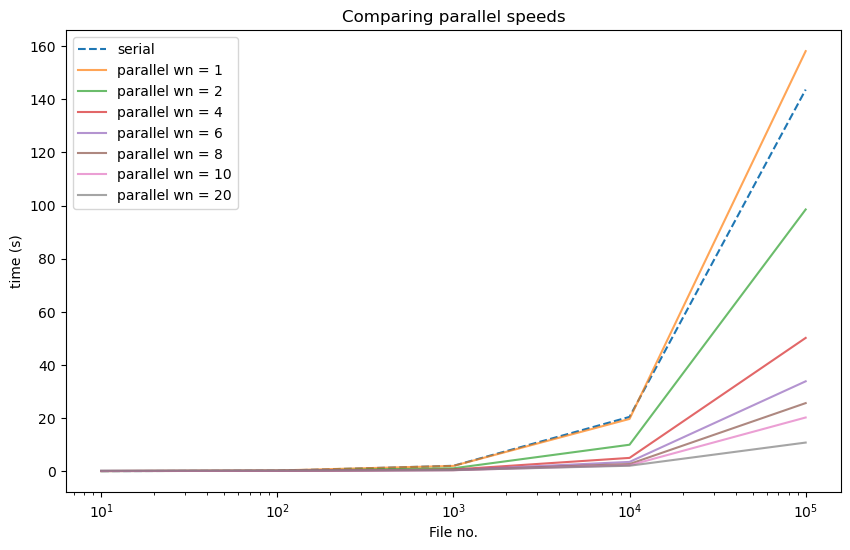

In [39]:
# Plotting the calculation times
fig = plt.figure(figsize=(10,6), facecolor='white')
plt.plot(n_files, unparallel_times, label = "serial", linestyle="dashed")
for e in range(len(n_workers)):
    wn = n_workers[e]
    p_n_times = parallel_times[e*len(n_files):(e+1)*len(n_files)]
    plt.plot(n_files, p_n_times, label = f"parallel wn = {wn}", alpha = 0.7)
plt.legend()
plt.title ("Comparing parallel speeds")
plt.xlabel("File no.")
plt.ylabel("time (s)")
#plt.yscale("log") 
plt.xscale("log") 
plt.show()

### Testing lab reference

In [6]:
# generating the lab reference
data_n4, data_norm_n4, fram, wrt = test_sp.gen_lab_ref(n_lab = 40, n_start=200)

=> Sampling 40 files, starting at 200
40


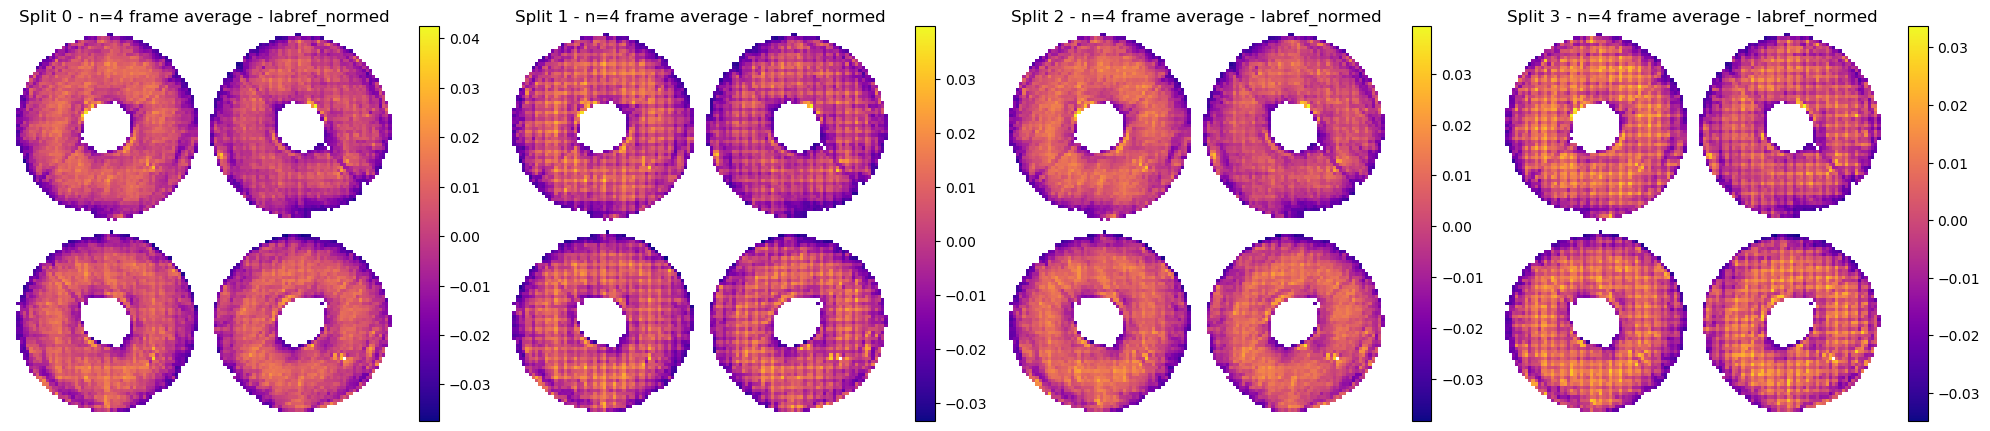

In [19]:
# display averages - lab
data_to_show_4 = data_norm_n4

fig = plt.figure(figsize=(20,6), facecolor='white')
vmin = -4e-2
vmax = 4e-2

for i in range(4):
    ax = plt.subplot(141+i)
    plt.title(f'Split {i} - n=4 frame average - labref_normed')
    im = plt.imshow(data_to_show_4[i]*test_sp.mask_nan, cmap = 'plasma' )#, vmin=vmin, vmax=vmax)
    plt.colorbar(im, fraction=0.046)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [20]:
# generating the lab reference
data_n40, data_norm_n40, fram, wrt = test_sp.gen_lab_ref(n_lab = 40, n_start=200)

=> Sampling 40 files, starting at 200


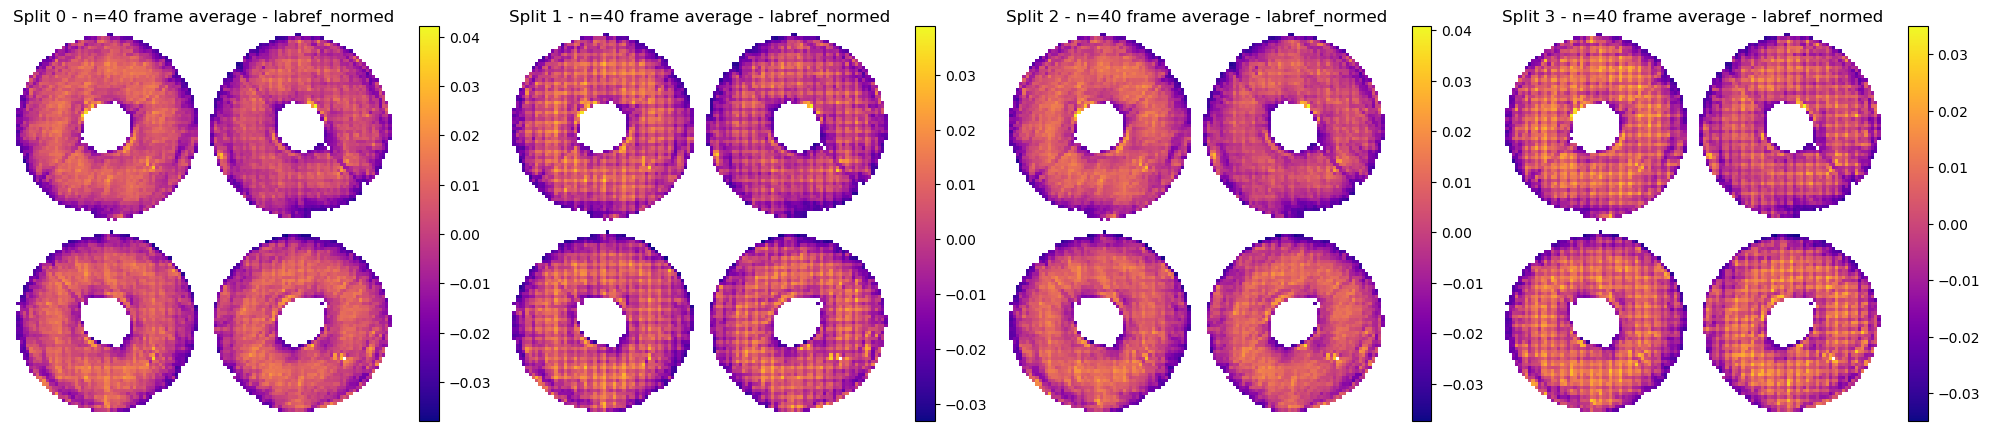

In [21]:
# display averages - lab
data_to_show_4 = data_norm_n40

fig = plt.figure(figsize=(20,6), facecolor='white')
vmin = -4e-2
vmax = 4e-2

for i in range(4):
    ax = plt.subplot(141+i)
    plt.title(f'Split {i} - n=40 frame average - labref_normed')
    im = plt.imshow(data_to_show_4[i]*test_sp.mask_nan, cmap = 'plasma')#, vmin=vmin, vmax=vmax)
    plt.colorbar(im, fraction=0.046)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [24]:
# generating the lab reference
data_n400, data_norm_n400, fram, wrt = test_sp.gen_lab_ref(n_lab = 400, n_start=200)

=> Sampling 400 files, starting at 200


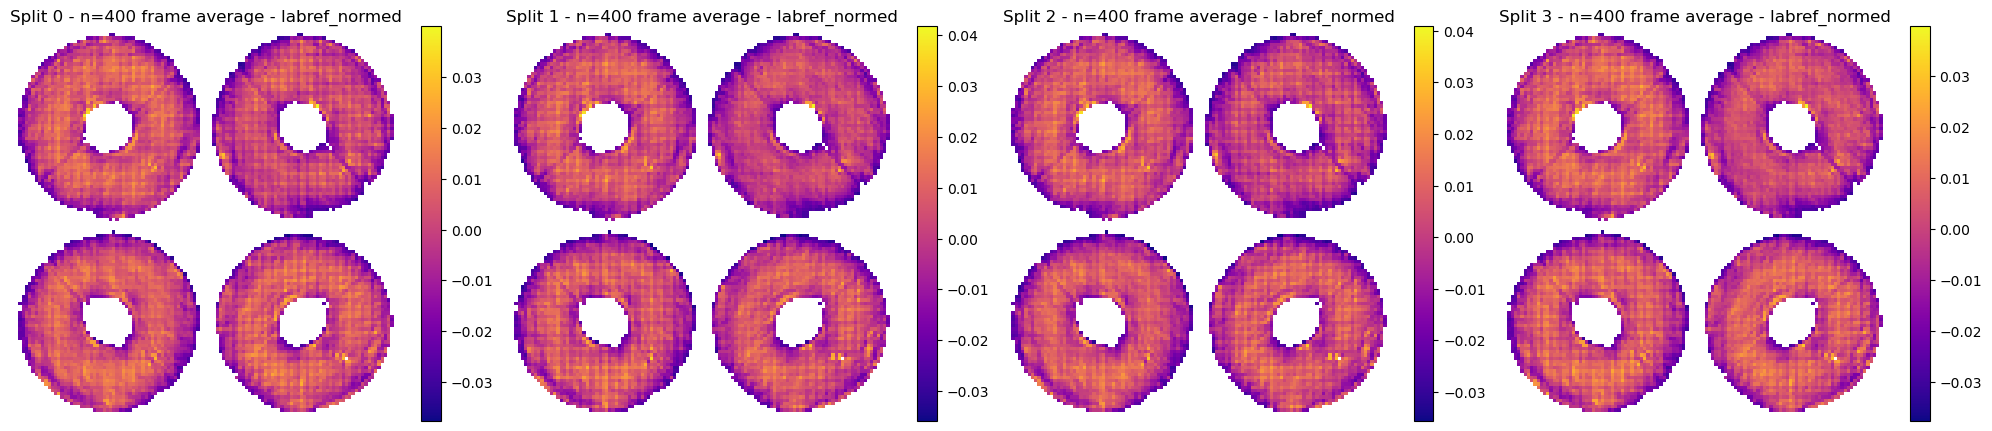

In [25]:
# display averages - lab
data_to_show_4 = data_norm_n400

fig = plt.figure(figsize=(20,6), facecolor='white')
vmin = -4e-2
vmax = 4e-2

for i in range(4):
    ax = plt.subplot(141+i)
    plt.title(f'Split {i} - n=400 frame average - labref_normed')
    im = plt.imshow(data_to_show_4[i]*test_sp.mask_nan, cmap = 'plasma')#, vmin=vmin, vmax=vmax)
    plt.colorbar(im, fraction=0.046)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Look at differences between lab ref lengths

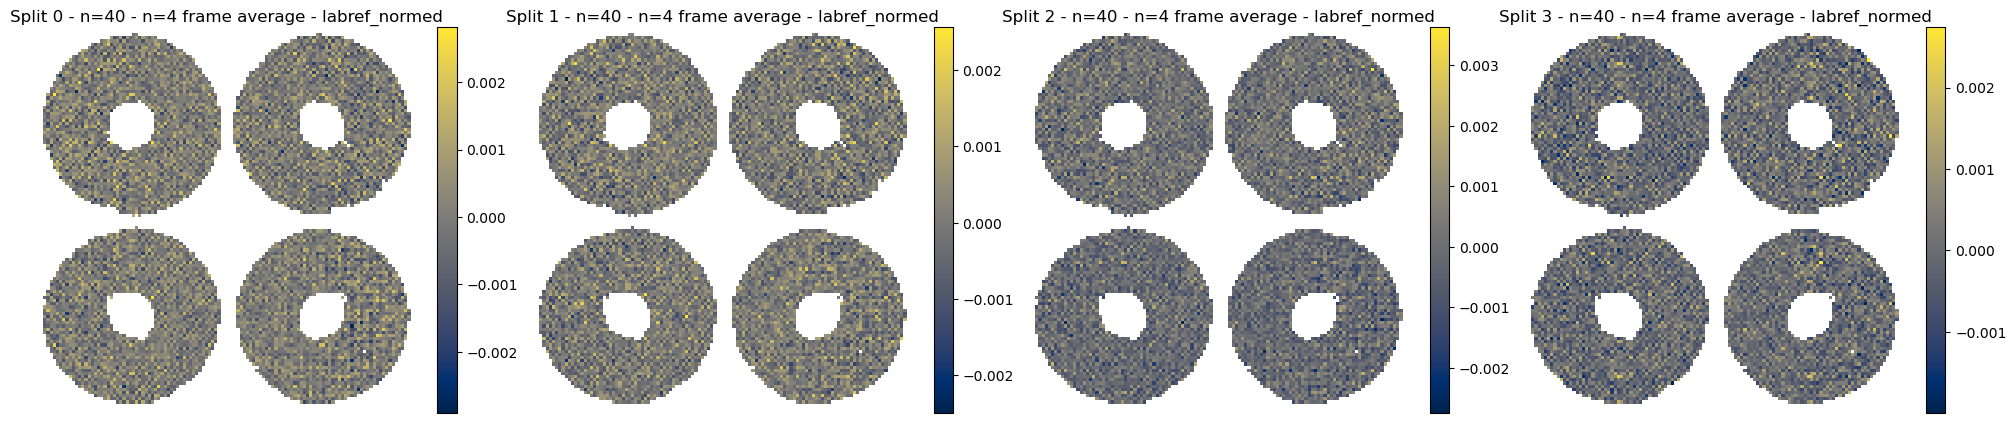

In [28]:
# display averages - lab
data_to_show_4 = data_norm_n40 - data_norm_n4

fig = plt.figure(figsize=(20,6), facecolor='white')
vmin = -4e-2
vmax = 4e-2

for i in range(4):
    ax = plt.subplot(141+i)
    plt.title(f'Split {i} - n=40 - n=4 frame average - labref_normed')
    im = plt.imshow(data_to_show_4[i]*test_sp.mask_nan, cmap = 'cividis')#, vmin=vmin, vmax=vmax)
    plt.colorbar(im, fraction=0.046)
    plt.axis('off')
plt.tight_layout()
plt.show()

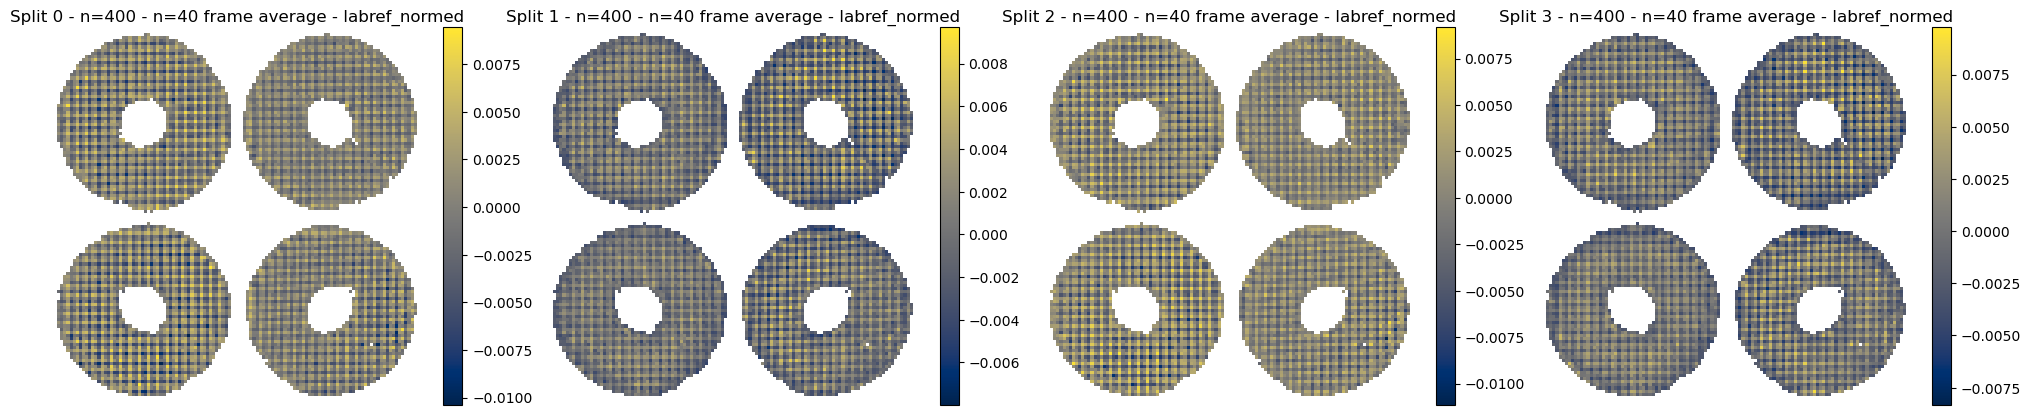

In [29]:
# display averages - lab
data_to_show_4 = data_norm_n400 - data_norm_n40

fig = plt.figure(figsize=(20,6), facecolor='white')
vmin = -4e-2
vmax = 4e-2

for i in range(4):
    ax = plt.subplot(141+i)
    plt.title(f'Split {i} - n=400 - n=40 frame average - labref_normed')
    im = plt.imshow(data_to_show_4[i]*test_sp.mask_nan, cmap = 'cividis')#, vmin=vmin, vmax=vmax)
    plt.colorbar(im, fraction=0.046)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [266]:
all_return = test_sp.file_sample_n_clean(test_sp.dir_lab, 2000, n_start=0)
data_ar = np.array([ar[0] for ar in all_return])

In [267]:
data_ar = np.array(data_ar)

In [268]:
d_arr = []
for d in data_ar: 
    d_arr.append(test_sp.dot_data(d))

d_arr = np.array(d_arr)

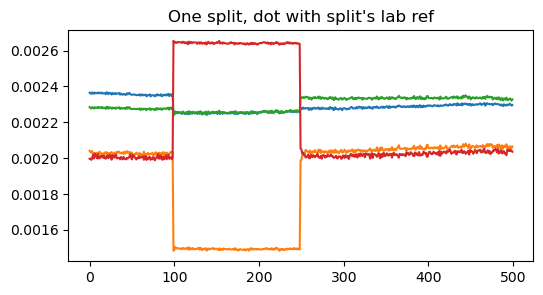

In [269]:
fig = plt.figure(figsize=(6,3), facecolor='white')
plt.title("One split, dot with split's lab ref")
plt.plot(d_arr[::4])

In [232]:
split_0_dot_0 = d_arr[::4, 1]
np.argmax(np.diff(split_0_dot_0))

248

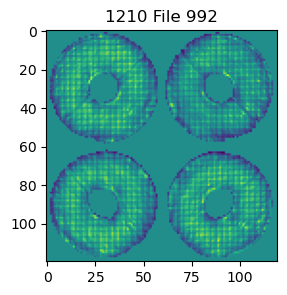

In [235]:
n_frame = 4*248
fig = plt.figure(figsize=(3,3), facecolor='white')
plt.title(f"1210 File {n_frame}")
plt.imshow(data_ar[n_frame])

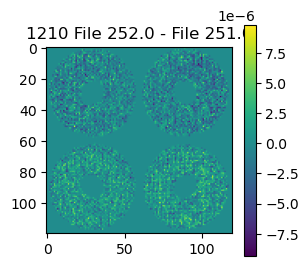

In [250]:
n_frame = 4*252
fig = plt.figure(figsize=(3,3), facecolor='white')
plt.title(f"1210 File {n_frame/4} - File {n_frame/4 - 1}")
im = plt.imshow(data_ar[n_frame] - data_ar[n_frame-4])
plt.colorbar(im)

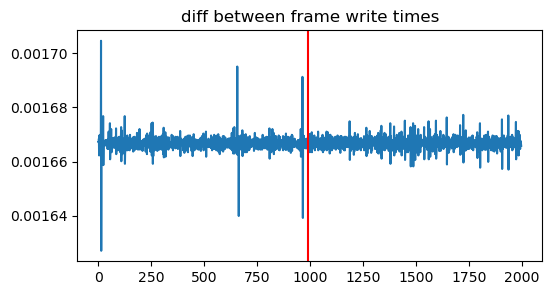

In [256]:
fig = plt.figure(figsize=(6,3), facecolor='white')
plt.title("diff between frame write times")
plt.plot(np.diff(np.array([ar[2] for ar in all_return])))
plt.axvline(4*248, color='r')

#### moving the demo file for copying

In [6]:
# making a directory and copying files into it:
import os

data_dir = lab_dir_1210
ex_dir = "../ex_skip/"

os.mkdir(data_dir+ex_dir)

In [ ]:
for n in range()

In [37]:
data_ar = np.array([ar[0] for ar in all_return])

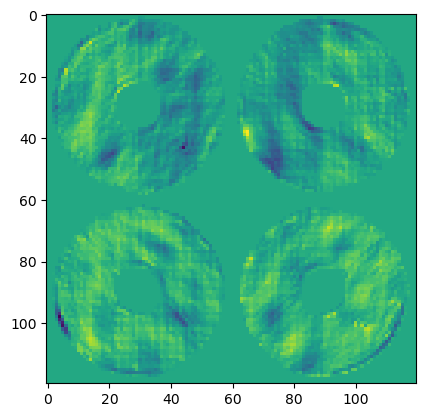

In [53]:
plt.imshow(test_sp.labref[2])